# MIIII

In [1]:
import jax.numpy as jnp
from jax import random
import jax
import numpy as np
from functools import partial
from matplotlib import pyplot as plt
import seaborn as sns
import miiiii
from miiiii import alpha_fn

In [2]:
seed = 0
cfg, (rng, key) = miiiii.get_conf(), random.split(random.PRNGKey(seed))
ns = partial(miiiii.base_ns, miiiii.digit_fn)
train_data, valid_data = miiiii.prime_fn(cfg.n, cfg.base, ns, rng)
params = miiiii.init_fn(key, cfg, *train_data)

# train
apply_fn = miiiii.make_apply_fn(miiiii.vaswani_fn)
train_fn, state = miiiii.init_train(
    apply_fn, params, cfg, alpha_fn, train_data, valid_data
)
(params, opt_state, ema_grads), metrics = train_fn(cfg.epochs, rng, state)

In [ ]:
train_loss, valid_loss, train_metrics, valid_metrics = metrics
train_acc, train_prec, train_rec, train_f1 = train_metrics
valid_acc, valid_prec, valid_rec, valid_f1 = valid_metrics

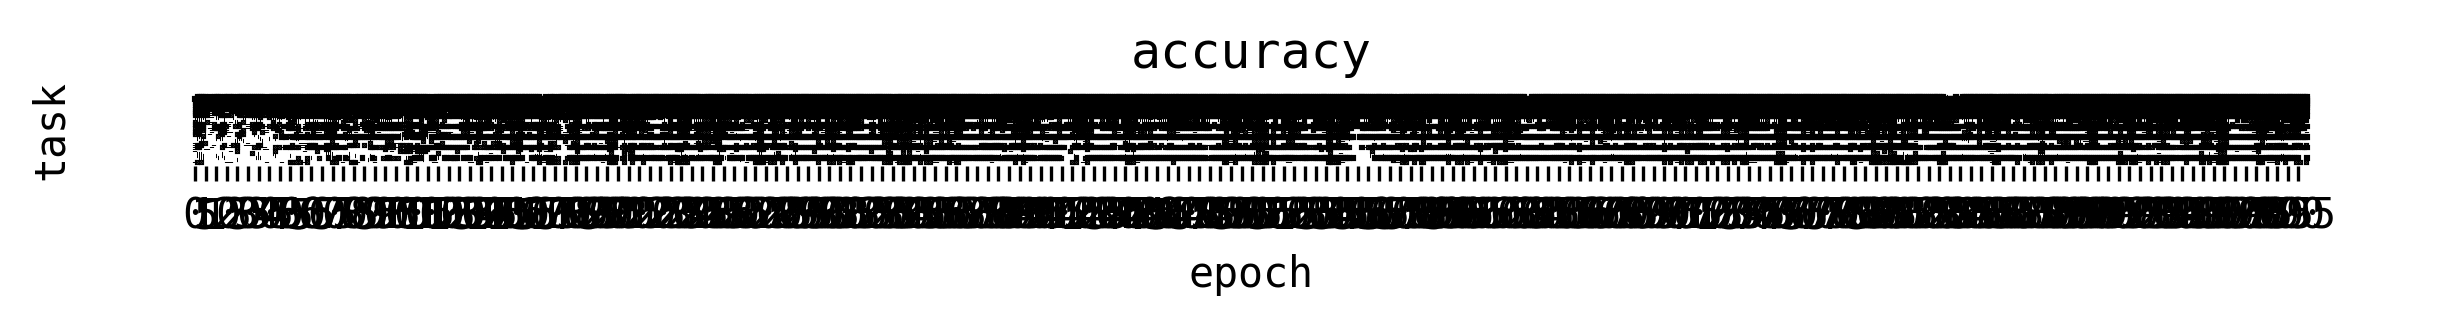

In [ ]:
def hinton_ish(matrix, cfg, metric="accuracy"):
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor("white")
    ax.set_aspect("equal", "box")
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = "black"
        size = (w / max_weight) ** (1 / 2.0)
        rect = plt.Rectangle(
            [x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color
        )
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    ax.set_xlabel("epoch")
    ax.set_ylabel("task")
    ax.set_title(metric)
    for spine in ax.spines.values():
        spine.set_visible(False)
    # add epoch numbers on top
    ax.set_xticks(np.arange(matrix.shape[0], step=50))


hinton_ish(np.array(train_f1), cfg)
plt.show()